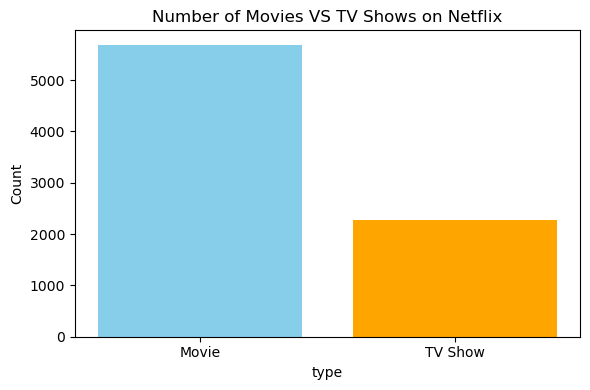

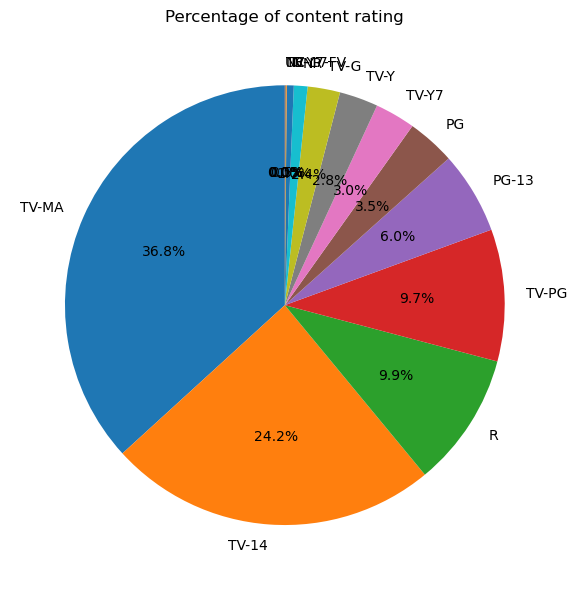

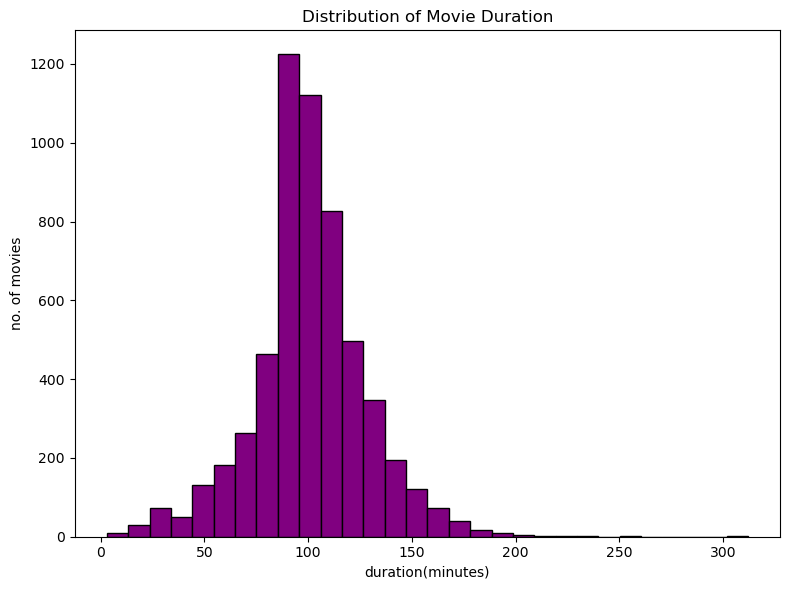

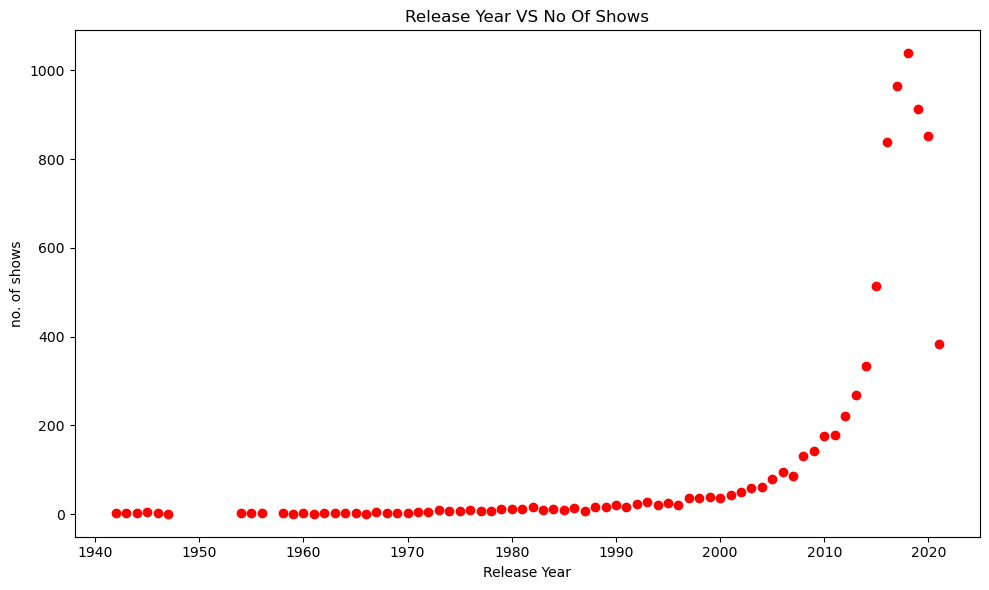

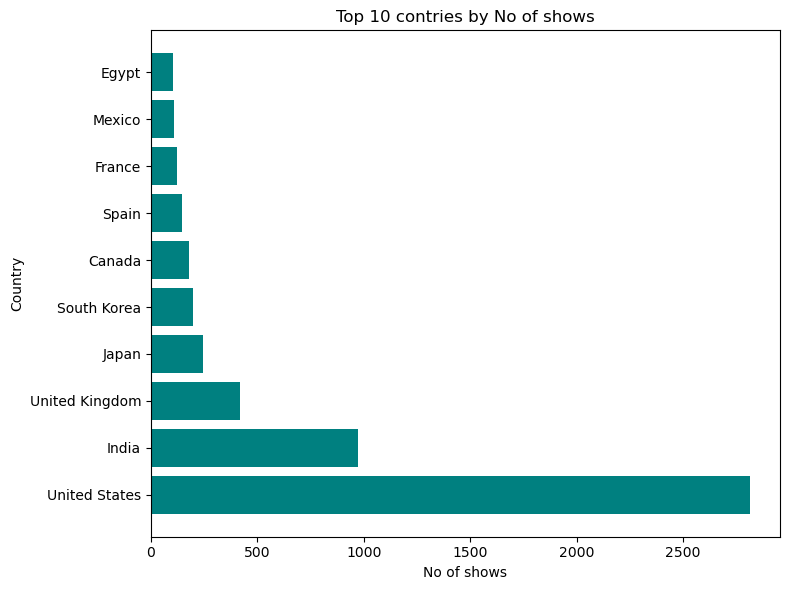

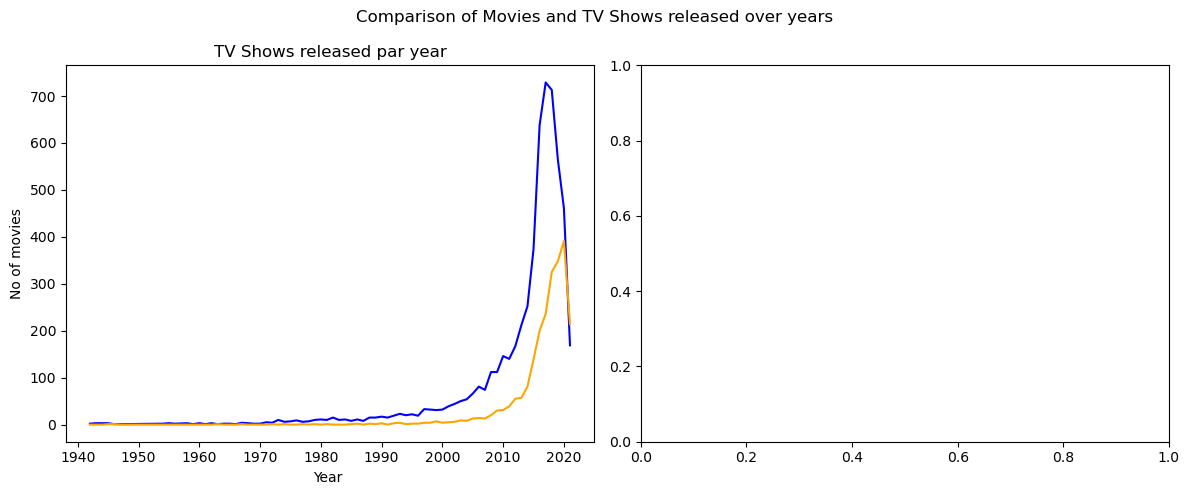

In [18]:
# Step 1 - Load the libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('netflix_titles.csv')


# clean the data
df = df.dropna(subset = ['type', 'release_year', 'rating', 'country', 'duration'])

type_counts= df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title('Number of Movies VS TV Shows on Netflix')
plt.xlabel('type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Movies_vs_tvshows.png')
plt.show()

rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of content rating')
plt.tight_layout()
plt.savefig('contents_rating.png')
plt.show()

movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('duration(minutes)')
plt.ylabel('no. of movies')
plt.tight_layout()
plt.savefig('Movie_duration_histogram.png')
plt.show()

release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release Year VS No Of Shows')
plt.xlabel('Release Year')
plt.ylabel('no. of shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 contries by No of shows')
plt.xlabel('No of shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10countries.png')
plt.show()

content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

#1st subplot:movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies released par year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('No of movies')

#2nd subplot:TV Shows
ax[0].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[0].set_title('TV Shows released par year')
ax[0].set_xlabel('Year ')
ax[0].set_ylabel('No of movies')

fig.suptitle('Comparison of Movies and TV Shows released over years')

plt.tight_layout()
plt.savefig('Movies_TV_Shows_Comparison.png')
plt.show()